# Embedding

##

### 2022-1 RecommenderSystem Project

#### Enviroment

- python ->	3.9.7
- pandas ->	1.4.1
- numpy ->	1.21.5
- nltk ->	3.7

#### Data

- beer_reviews.csv (<https://www.kaggle.com/datasets/rdoume/beerreviews>)

#### Author

- Lee Junhee

#### Reference

- <https://velog.io/@rsj9987/%EB%A6%AC%EB%B7%B0-%EB%B6%84%EC%84%9D%EC%9D%84-%ED%86%B5%ED%95%9C-%EB%A7%A5%EC%A3%BC-%EC%B6%94%EC%B2%9C-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98#2-5-%ED%86%A0%ED%81%B0-%EA%B0%80%EC%A4%91%EC%B9%98-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%83%9D%EC%84%B1>

---

#### 데이터 살피기

필요한 패키지를 추가한다.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# 자연어 처리 라이브러리 토큰화를 위해 사용
import nltk
# nltk.tokenize.word_tokenize 함수를 사용하기 위해 딱 한번 주석을 해제하여 실행해야한다.
# nltk.download('punkt')

# 불용어를 위해 쓰이는 라이브러리
import requests
import re

CSV 파일에서 데이터를 읽어 온다.

In [ ]:
beerReviews = pd.read_csv("./data/merged_data.csv")

상위 5개의 데이터를 살펴본다.

In [ ]:
beerReviews.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,Description
0,10,163,Amstel Brouwerij B. V.,1010963392,3.0,2.0,3.0,fodeeoz,Light Lager,2.5,2.5,Amstel Light,3.5,436,ABV in the USA is 4.1%\t
1,18,163,Amstel Brouwerij B. V.,1010861086,2.5,3.0,3.0,jdhilt,Light Lager,2.0,2.0,Amstel Light,3.5,436,ABV in the USA is 4.1%\t
2,30,163,Amstel Brouwerij B. V.,1002109880,3.0,2.0,2.0,xXTequila,Light Lager,2.0,3.0,Amstel Light,3.5,436,ABV in the USA is 4.1%\t
3,40,163,Amstel Brouwerij B. V.,988202869,3.0,3.0,3.0,Brent,Light Lager,2.0,2.0,Amstel Light,3.5,436,ABV in the USA is 4.1%\t
4,750,163,Amstel Brouwerij B. V.,1264904623,3.5,2.5,3.5,brownbeer,Light Lager,3.0,3.0,Amstel Light,3.5,436,ABV in the USA is 4.1%\t


하위 5의 데이터를 살펴본다.

In [ ]:
beerReviews.tail()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,Description
452949,1683163,14359,The Defiant Brewing Company,1175746381,3.5,4.0,4.0,maddogruss,American IPA,4.0,4.0,India Pale Ale,6.2,35185,This ale is traditionally highly hopped and ro...
452950,1683164,14359,The Defiant Brewing Company,1171081089,4.0,4.5,4.0,dherling,American IPA,4.0,4.5,India Pale Ale,6.2,35185,Green Man India Pale Ale is delectably hoppy w...
452951,1683165,14359,The Defiant Brewing Company,1171081089,4.0,4.5,4.0,dherling,American IPA,4.0,4.5,India Pale Ale,6.2,35185,This ale is traditionally highly hopped and ro...
452952,1683166,14359,The Defiant Brewing Company,1170979828,4.0,4.0,4.5,cbl2,American IPA,4.0,4.0,India Pale Ale,6.2,35185,Green Man India Pale Ale is delectably hoppy w...
452953,1683167,14359,The Defiant Brewing Company,1170979828,4.0,4.0,4.5,cbl2,American IPA,4.0,4.0,India Pale Ale,6.2,35185,This ale is traditionally highly hopped and ro...


#### Embedding 과정

각 맥주들을 표현한 의미있는 Embedding을 위해 Description 열을 이용한다.

Description은 맥주의 설명을 적은 문장이므로, 각 문장의 단어들을 Embedding하고 결과를 이용하여 맥주를 표현하는 Embedding vector를 정의한다.

Description을 사용하기 전에 임의 데이터의 Description 값을 출력해본다.

In [ ]:
def print_beer_with_description_by_id(dataIdx):
	global beerReviews
	print(f"idx: {dataIdx}\nbeer_name: { beerReviews['beer_name'].iloc[dataIdx] }\ndescription: {beerReviews['Description'].iloc[dataIdx]}\n")

print_beer_with_description_by_id(0)
print_beer_with_description_by_id(452952)

idx: 0
beer_name: Amstel Light
description: ABV in the USA is 4.1%	

idx: 452952
beer_name: India Pale Ale
description: Green Man India Pale Ale is delectably hoppy with a properly balanced body. Generous hop additions give it a wonderful bitterness and pleasant floral nose, while our combination of traditional British malts creates a rich, satisfying flavor and alluring copper color. This authentic English-style IPA is our flagship ale.	



두개의 데이터 중 상위의 데이터(Amstel Light)의 경우는 Description에서 맥주의 특징을 잘 설명하지 않고 있다. 아래의 데이터(India Pale Ale)는 Description에 맥주에 대한 설명히 자세하게 적혀있다.

위의 데이터의 경우, Embedding vector를 얻는 것이 힘들어 보이고 아래 데이터의 경우, 적절한 임베딩 벡터를 얻을 수 있을거라 예상한다.

임베딩을 위해서 각 문장을 수치화 해야한다. 문장을 수치화 하기 위한 방법으로 **Bag of Words 모델**을 사용하여 단어의 빈도수에 대한 집합으로 나타낸다. nltk 패키지를 사용하였다.

~~위의 과정을 위해 일단 beer_name과 Description을 따로 뽑아낸다.~~

맥주의 정보만 갖고 있는 데이터 프레임도 따로 뽑아낸다.

In [ ]:
# descriptions = beerReviews["Description"]
# descriptions
beersDuplicated = beerReviews[["beer_beerid", "beer_name", "beer_style", "beer_abv", "Description"]]
beersDuplicated

,beer_name,beer_style,Description
0,Amstel Light,Light Lager,ABV in the USA is 4.1%\t
1,Amstel Light,Light Lager,ABV in the USA is 4.1%\t
2,Amstel Light,Light Lager,ABV in the USA is 4.1%\t
3,Amstel Light,Light Lager,ABV in the USA is 4.1%\t
4,Amstel Light,Light Lager,ABV in the USA is 4.1%\t
...,...,...,...
452949,India Pale Ale,American IPA,This ale is traditionally highly hopped and ro...
452950,India Pale Ale,American IPA,Green Man India Pale Ale is delectably hoppy w...
452951,India Pale Ale,American IPA,This ale is traditionally highly hopped and ro...
452952,India Pale Ale,American IPA,Green Man India Pale Ale is delectably hoppy w...


~~Descriptions는 맥주에 대한 사용자들의 평가 데이터에서 가져온 데이터 이기 때문에 중복이 되어 나타난다.~~

~~맥주에 대한 Description을 Dataframe로 만든다.~~

리뷰데이터에서 나온 데이터이기 때문에 같은 맥주가 중복되어 나타난다.

중복을 제거하여 맥주의 데이터프레임을 만든다.

In [ ]:
# beerDescriptions = pd.DataFrame(descriptions.unique(), columns=["beer_descriptions"])
# print(beerDescriptions)

beers = beersDuplicated.drop_duplicates()
beers

,beer_name,beer_style,Description
0,Amstel Light,Light Lager,ABV in the USA is 4.1%\t
6,Mogli,American Porter,'Oak Aged Imperial Porter Brewed with Chocolat...
263,Hefeweizen,Hefeweizen,Formerly In-Heat Wheat\t
264,Hefeweizen,Hefeweizen,An authentic example of a Bavarian Hefeweizen....
265,Hefeweizen,Hefeweizen,"Our Hefeweizen is a light, unfiltered wheat be..."
...,...,...,...
452344,Ephraim,American Double / Imperial IPA,Ephraim (1823-1913) was our great-great grandf...
452539,James Black Ale,American Black Ale,James was our Uncle (Edward James Hill Jr.). H...
452540,Fear And Trembling (Cabernet/Bourbon Blend),Baltic Porter,Fear and Trembling is Hill Farmstead’s first c...
452606,Jubilee,Winter Warmer,HOPS: German BlancMALTS: PilsnerADDITIONS: Pri...


각 Description을 단어로 토큰화 한다.

In [8]:
tokenizedDescriptions = beerDescriptions["beer_descriptions"].apply(nltk.tokenize.word_tokenize).to_numpy()
# 3개만 출력
print(tokenizedDescriptions[:3])

[list(['ABV', 'in', 'the', 'USA', 'is', '4.1', '%'])
 list(["'Oak", 'Aged', 'Imperial', 'Porter', 'Brewed', 'with', "Chocolate'Caldera", 'Kettle', 'SeriesJune', '2011', '-', 'first', 'release', 'in', 'waxed', '22', 'oz', '.', 'bottles'])
 list(['Formerly', 'In-Heat', 'Wheat'])]


토큰화된 단어들을 하나의 리스트로 만든다. 그리고 중복된 단어들을 지운 단어의 집합을 만든다. 모든 단어들은 소문자화 한다.

In [9]:
allWords = np.concatenate(tokenizedDescriptions)
lower_case = lambda word: str.lower(word)
allWords = [lower_case(word) for word in allWords]
words = set(allWords)
words = list(words)
print(f"Number of words: {len(allWords)}")
print(f"Number of unique words: {len(words)}")


Number of words: 87896
Number of unique words: 9674


특징에 중심을 두어 품사를 선택했다. 형용사만을 포함하고 나머지는 제거하였다.

In [10]:
featureAllWords = []
for word in nltk.tag.pos_tag(allWords):
    if word[1] in ['JJ', 'JJR', 'JJS', ]: # 고유명사를 제외한 명사, 형용사만을 포함
        featureAllWords.append(word[0])

words = set(featureAllWords)
words = list(words)

고유한 한 가지 단어가 나온 빈도수를 값으로 갖는 DataFrame를 만든다.

In [11]:
wordCounts = dict.fromkeys(words, 0)
for word in featureAllWords:
	wordCounts[word] += 1

wordCounts = pd.DataFrame.from_dict(wordCounts, orient='index', columns=["counts"])
wordCounts

,counts
es,1
wet,1
blue,14
personal,1
glorious,1
...,...
geary,1
blonde,4
goldingdry,1
gold-medal,2


영어 불용어를 삭제한다. 불용어는 이미 만들어진 것을 가져와 사용했다.

In [12]:
stopwordsList = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords = set(stopwordsList.decode().splitlines()) 

for index in wordCounts.index:
	if index in stopwords:
		wordCounts = wordCounts.drop(index)

wordCounts

,counts
wet,1
blue,14
personal,1
glorious,1
autumn,1
...,...
geary,1
blonde,4
goldingdry,1
gold-medal,2


숫자와 문장부호도 보인다. regular expression을 이용하여 삭제하자.

In [13]:
r = re.compile("[0-9\W]+")

for index in wordCounts.index:
	if r.match(index) != None :
		wordCounts = wordCounts.drop(index)

wordCounts

,counts
wet,1
blue,14
personal,1
glorious,1
autumn,1
...,...
geary,1
blonde,4
goldingdry,1
gold-medal,2


기술 통계량을 살펴보자.

In [14]:
wordCounts.describe()

,counts
count,2252.000000
mean,4.642096
std,14.353436
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,219.000000


단어 갯수 2252 어림잡아 50% 이상 단어의 빈도수가 1임을 알 수 있다. 그리고 가장 큰 빈도수는 219이다.

100개의 묶음으로 그래프를 그렸을 때, 첫번째 구간 (약 0~10) 가 가장 많은 수가 나왔다.

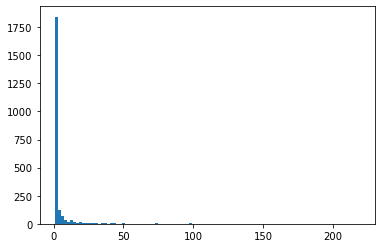

In [15]:
plt.hist(wordCounts, bins=100)
plt.show()


한 번 나온 단어는 맥주들을 표현하는 단어라고 보기에 적합하지 않다.

전체 맥주에서 맥주를 표현한 단어라면 한 번 나오지는 않았을 것이다.

즉, 빈도가 적은 단어들은 전체적인 맥주의 특징을 나타낼 수 있는 단어라고 보기 어렵다. 그러므로 **10개 이하의 개수인 데이터를 제거한다.**

In [16]:
maxThreshold = 10

print(f"{maxThreshold}회 이하의 발생빈도 단어 수: {len(wordCounts[wordCounts.counts <= maxThreshold].index)}")
wordCounts = wordCounts.drop(wordCounts[wordCounts.counts <= maxThreshold].index)
wordCounts.describe()

10회 이하의 발생빈도 단어 수: 2082


,counts
count,170.000000
mean,39.205882
std,37.556253
min,11.000000
25%,15.000000
50%,24.000000
75%,43.000000
max,219.000000


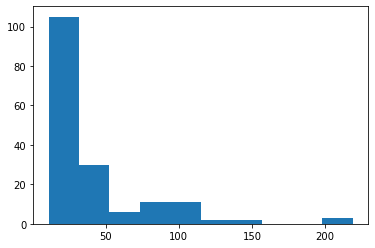

In [17]:
plt.hist(wordCounts, bins=10)
plt.show()

170개의 단어가 선정 되었다. 단어 사전을 list에 저장해둔다.

In [18]:
wordLexicon = wordCounts.index.to_list()
wordLexicon.sort()
WORDS_SIZE = len(wordLexicon)
print(f"number of words: {WORDS_SIZE}")
print(wordLexicon)

number of words: 170
['abv', 'ale', 'amber', 'american', 'american-style', 'ancient', 'aromatic', 'assertive', 'authentic', 'award-winning', 'balanced', 'bavarian', 'beautiful', 'belgian', 'belgian-style', 'big', 'bitter', 'black', 'blue', 'bold', 'bright', 'british', 'brown', 'canadian', 'caramel', 'citrusy', 'classic', 'clean', 'clear', 'coastal', 'cold', 'complex', 'cool', 'creamy', 'crisp', 'crystal', 'dark', 'deep', 'delicate', 'delicious', 'delightful', 'distinct', 'distinctive', 'double', 'drinkable', 'dry', 'dry-hopped', 'duck-rabbit', 'early', 'earthy', 'east', 'easy', 'elegant', 'english', 'english-style', 'european', 'extra', 'famous', 'favorite', 'fine', 'finest', 'finish', 'flavorful', 'floral', 'free', 'french', 'fresh', 'full-bodied', 'full-flavored', 'generous', 'gentle', 'german', 'german-style', 'golden', 'good', 'great', 'green', 'herbal', 'high', 'highest', 'historic', 'hoppy', 'hot', 'ibu', 'imperial', 'india', 'intense', 'international', 'irish', 'lager', 'large',

모든 맥주에 대해서 맥주가 가진 사전 단어의 인덱스 리스트를 만든다.

In [19]:
# TODO: 모든 맥주에 대해서 맥주가 가진 사전 단어의 인덱스 리스트를 형성
def get_voca_indices(tokenizedList):
	global wordLexicon
	indicesList = []
	for token in tokenizedList:
		indices = [idx for idx, word in enumerate(wordLexicon) if word in token]
		indicesList.append(indices)
	return indicesList

wordIndicesOfDescription = get_voca_indices(tokenizedDescriptions)
print(len(wordIndicesOfDescription))
print(wordIndicesOfDescription[:10])


1403
[[], [], [], [8, 61, 120, 151, 157], [1, 10, 26, 73, 89, 91, 93, 94, 100, 149, 150, 161, 162], [93, 130], [1, 111, 141, 147, 159], [48, 67, 99, 100, 126], [1, 39, 48, 99, 126, 155], [22, 66]]


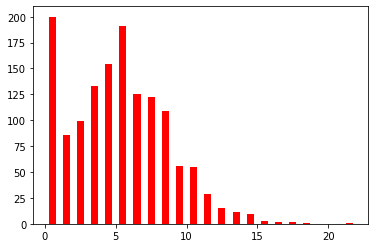

In [20]:
def get_counts_of_words(wordsByBeers):
	counts = []
	for words_indices in wordsByBeers:
		counts.append(len(words_indices))
	return counts
	
def plot_counts_of_words(wordsByBeers, bins):
	counts = get_counts_of_words(wordsByBeers)
	plt.hist(counts, bins=bins, range=(0, bins), rwidth=0.5, color="red")
	plt.show()
	
plot_counts_of_words(wordIndicesOfDescription, 22)

꽤나 많은 문장들이 **빈 리스트**를 갖고 있고 **단어가 하나인 문장**들은 학습에 쓰이지 못한다.

일단 하나 이상의 단어를 가진 맥주의 설명에서, **맥주 하나가 가지는 단어들은 유사한 단어**라고 생각하고 각 단어의 페어를 만든다. 이어 Autoencoder 구조를 만들어서 학습시킨다.

In [21]:
from itertools import permutations
import random

# TODO: 맥주가 가진 단어들의 인덱스의 크기 2짜리 순서쌍을 생성한다.
indexPairByBeers = []
for wordIndices in wordIndicesOfDescription:
	for indexPair in permutations(wordIndices, 2):
		indexPairByBeers.append(indexPair)
random.shuffle(indexPairByBeers)
print(f"The length of pairs: {len(indexPairByBeers)}")
print(indexPairByBeers[:50])


The length of pairs: 41570
[(131, 36), (97, 145), (20, 63), (97, 136), (37, 95), (26, 59), (59, 132), (36, 1), (38, 132), (148, 132), (1, 27), (168, 89), (24, 132), (98, 110), (1, 24), (44, 66), (59, 134), (45, 99), (162, 150), (77, 20), (164, 144), (163, 1), (108, 24), (93, 99), (109, 36), (52, 149), (52, 1), (89, 1), (124, 89), (79, 60), (132, 61), (44, 99), (156, 30), (150, 27), (32, 99), (6, 100), (60, 6), (42, 115), (45, 105), (28, 75), (134, 60), (15, 129), (130, 156), (155, 73), (134, 1), (51, 17), (26, 67), (153, 131), (147, 132), (61, 143)]


In [22]:
from torch.utils.data import Dataset

class WordPairsDataset(Dataset):
	def __init__(self, pairs):
		self.pairs = pairs
	
	def __len__(self):
		return len(self.pairs)

	def __getitem__(self, idx):
		return self.pairs[idx]

train_num = len(indexPairByBeers)*7//10
print(f"The 70% of data is for trainning => number of data: {train_num}")
print(f"The 30% of data is for testing => number of data: {len(indexPairByBeers) - train_num}")
trainDataset = WordPairsDataset(indexPairByBeers[:train_num])
testDataset = WordPairsDataset(indexPairByBeers[train_num:])

The 70% of data is for trainning => number of data: 29099
The 30% of data is for testing => number of data: 12471


In [23]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64
trainDataLoader = DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True)
testDataLoader = DataLoader(testDataset, batch_size=BATCH_SIZE, shuffle=True)

In [24]:
import torch
# TODO: Autoencoder 구조 생성
class WordEmbeddingNN(torch.nn.Module):
    def __init__(self):
        super(WordEmbeddingNN, self).__init__()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(170, 85),
            torch.nn.ReLU(),
            torch.nn.Linear(85, 170),
        )

    def forward(self, x):
        x = x.to(torch.float32)
        x = self.linear_relu_stack(x)
        return x

In [25]:
# TODO: 학습
def training(trainLoader, testLoader, network, lossFunc, optim, epoches = 20):
    train_losses_per_epoch = []
    test_losses_per_epoch = []
    
    train_accuracies = []
    test_accuracies = []
    
    
    for epoch in range(epoches):
                
        # 모델를 학습 중이라고 선언하기
        network.train()
        
        train_losses, train_correct = training_epoch(trainLoader, network, lossFunc, optim, epoch)
        
        # epoch 별로 loss 평균값, 정확도 구하기
        average_loss = np.mean(train_losses)
        train_losses_per_epoch.append(average_loss)
        
        train_accuracy = train_correct / len(trainLoader.dataset) * 100
        train_accuracies.append(train_accuracy)
        
        # epoch 별로 정확도 출력
        print(f'\nTraining set: Accuracy: {train_correct}/{len(trainLoader.dataset)} ({100. * train_correct / len(trainLoader.dataset):.0f}%)')
        
        ### 학습 중에 test 결과 보기
        
        # 모델 test 중인 것을 선언하기
        network.eval()
        
        with torch.no_grad():
            test_losses, test_accuracy = test_epoch(testLoader, network, lossFunc)

        test_losses_per_epoch.append(np.mean(test_losses))
        test_accuracies.append(test_accuracy)
        
    return train_losses_per_epoch, test_losses_per_epoch, train_accuracies, test_accuracies

In [26]:
def training_epoch(train_loader, network, loss_func, optimizer, epoch):
    train_losses = []
    train_correct = 0
    log_interval = 500
    
    for batch_idx, (inputLabel, outputLabel) in enumerate(train_loader):
        optimizer.zero_grad()
        inputLabelOnehot = torch.nn.functional.one_hot(inputLabel.to(torch.int64), WORDS_SIZE)
        outputs = network.forward(inputLabelOnehot)
        
        # loss_func 함수를 적용하여 loss를 구하고 저장하기
        loss = loss_func(outputs, outputLabel)
        train_losses.append(loss.item())

        # training accuracy 정확도 구하기 위해 맞는 샘플 개수 세기
        pred = torch.max(outputs, 1).indices
        train_correct += pred.eq(outputLabel).sum()

        # Gradinet 구하기
        loss.backward()

        # weight값 update 하기
        optimizer.step()

        # 학습 상황 출력
        if batch_idx % log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(outputLabel)}/{len(train_loader.dataset)} ({100. * batch_idx*len(outputLabel) / len(train_loader.dataset):.0f}%)]\tLoss: {loss.item():.6f}')
            
    return train_losses, train_correct


In [27]:
def test_epoch(test_loader, network, loss_func):
    correct = 0
    
    test_losses = []
    
    with torch.no_grad():
        for batch_idx, (inputLabel, outputLabel) in enumerate(test_loader):
            inputLabelOnehot = torch.nn.functional.one_hot(inputLabel.to(torch.int64), WORDS_SIZE)

            # Forward propagration 계산하기.
            outputs = network.forward(inputLabelOnehot)

            # loss_func 함수를 적용하여 loss를 구하고 저장하기
            loss = loss_func(outputs, outputLabel)
            test_losses.append(loss.item())

            # Batch 별로 정확도 구하기
            pred = torch.max(outputs, 1).indices
            correct += pred.eq(outputLabel).sum()

        # 전체 정확도 구하기
        test_accuracy = 100. * correct / len(test_loader.dataset)

        #중간결과 출력
        print(f'Test set: Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')
    return test_losses, test_accuracy


In [28]:
lr = 0.001
betas = (0.9, 0.999)

def init_kaiming(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight.data, mode="fan_in")

net = WordEmbeddingNN()
net.apply(init_kaiming)
lossFunc = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(net.parameters(), lr, betas)

trainingResult = training(trainDataLoader, testDataLoader, net, lossFunc, optim)

Train Epoch: 0 [0/29099 (0%)]	Loss: 5.157753

Training set: Accuracy: 1525/29099 (5%)
Test set: Accuracy: 664/12471 (5%)

Train Epoch: 1 [0/29099 (0%)]	Loss: 4.626910

Training set: Accuracy: 1696/29099 (6%)
Test set: Accuracy: 704/12471 (6%)

Train Epoch: 2 [0/29099 (0%)]	Loss: 4.706437

Training set: Accuracy: 1755/29099 (6%)
Test set: Accuracy: 712/12471 (6%)

Train Epoch: 3 [0/29099 (0%)]	Loss: 4.400508

Training set: Accuracy: 1798/29099 (6%)
Test set: Accuracy: 661/12471 (5%)

Train Epoch: 4 [0/29099 (0%)]	Loss: 4.414091

Training set: Accuracy: 1845/29099 (6%)
Test set: Accuracy: 660/12471 (5%)

Train Epoch: 5 [0/29099 (0%)]	Loss: 4.376364

Training set: Accuracy: 1819/29099 (6%)
Test set: Accuracy: 676/12471 (5%)

Train Epoch: 6 [0/29099 (0%)]	Loss: 4.611049

Training set: Accuracy: 1822/29099 (6%)
Test set: Accuracy: 652/12471 (5%)

Train Epoch: 7 [0/29099 (0%)]	Loss: 4.287931

Training set: Accuracy: 1851/29099 (6%)
Test set: Accuracy: 636/12471 (5%)

Train Epoch: 8 [0/29099 

In [29]:
# TODO: Embedding matrix를 통해 모든 단어들의 임베딩 벡터를 구함
for name, param in net.named_parameters():
	print(f'name:{name}')
	print(type(param))
	print(f'param.shape:{param.shape}')
	print(f'param.requries_grad:{param.requires_grad}')
	print('=====')

name:linear_relu_stack.0.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([85, 170])
param.requries_grad:True
=====
name:linear_relu_stack.0.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([85])
param.requries_grad:True
=====
name:linear_relu_stack.2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([170, 85])
param.requries_grad:True
=====
name:linear_relu_stack.2.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([170])
param.requries_grad:True
=====


In [30]:
W = net.get_parameter("linear_relu_stack.0.weight")
print(W.shape)

torch.Size([85, 170])


In [31]:
# TODO: 맥주의 임베딩 벡터를 구함, 맥주가 가진 단어 임베딩 벡터의 평균을 맥주의 임베딩 벡터로 본다.
def embedding(W, wordIdx):
	wordIdx = torch.tensor(wordIdx)
	idxOnehot = torch.nn.functional.one_hot(wordIdx.to(torch.int64), WORDS_SIZE)
	return torch.matmul(W, idxOnehot.to(torch.float))

wordEmbedding = []
for i in range(WORDS_SIZE):
	wordEmbedding.append(embedding(W, i).detach().numpy())

print(f"shape of word embeddings: {np.array(wordEmbedding).shape}")

shape of word embeddings: (170, 85)


In [32]:
%%time
tokenized = descriptions.apply(nltk.tokenize.word_tokenize)

reviewWordIndicesOfDescription = get_voca_indices(tokenized)

CPU times: total: 3min 46s
Wall time: 3min 49s


In [52]:
def get_embedding(indicesList):
	global wordEmbedding
	embedding = []
	for indices in indicesList:
		if len(indices) == 0:
			embedding.append(None)
		else:
			embeddings = []
			for index in indices:
				embeddings.append(wordEmbedding[index])
			embedding.append(np.average(embeddings, axis=0))
	return embedding

reviewBeerEmbedding = get_embedding(reviewWordIndicesOfDescription)
print(f"number of reviews embeddings: {len(reviewBeerEmbedding)}")

beerEmbedding = get_embedding(wordIndicesOfDescription)
print(f"number of beers embeddings: {len(beerEmbedding)}")

number of reviews embeddings: 452954
number of reviews embeddings: 1403


In [53]:
# TODO: 맥주의 임베딩 벡터 저장
beerReviews["beer_embedding"] = reviewBeerEmbedding

In [62]:
embeddingBeerReviews = beerReviews.drop(beerReviews[beerReviews.beer_embedding.isna()].index)
embeddingBeerReviews


,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,Description,beer_embedding
264,1232,9020,Yazoo Brewing Company,1224350360,4.0,4.0,3.0,Likeburning,Hefeweizen,4.0,3.5,Hefeweizen,5.0,20575,An authentic example of a Bavarian Hefeweizen....,"[-0.024644503, 0.0784201, 0.0808744, 0.1565916..."
265,1233,9020,Yazoo Brewing Company,1224350360,4.0,4.0,3.0,Likeburning,Hefeweizen,4.0,3.5,Hefeweizen,5.0,20575,"Our Hefeweizen is a light, unfiltered wheat be...","[-0.06961535, 0.13217929, -0.020552807, 0.0370..."
266,1234,9020,Yazoo Brewing Company,1224350360,4.0,4.0,3.0,Likeburning,Hefeweizen,4.0,3.5,Hefeweizen,5.0,20575,"Hundreds of years ago in Germany, wheat beers ...","[-0.0892547, -0.17191029, -0.029708259, -0.043..."
479,1559,11715,Destiny Brewing Company,1136341254,2.5,3.0,4.0,weeare138,Herbed / Spiced Beer,3.0,2.5,Holiday Ale,7.5,27666,Two Roads Holiday Ale is inspired by the littl...,"[-0.14253859, -0.012036798, -0.17999944, -0.01..."
480,1560,11715,Destiny Brewing Company,1131391277,4.5,4.5,4.0,GnomeKing,Pumpkin Ale,4.0,5.0,Pumpkin Ale,5.0,26817,Our Pumpkin Ale blends the spices of the harve...,"[0.07678093, -0.08536074, 0.107461974, -0.0262..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452949,1683163,14359,The Defiant Brewing Company,1175746381,3.5,4.0,4.0,maddogruss,American IPA,4.0,4.0,India Pale Ale,6.2,35185,This ale is traditionally highly hopped and ro...,"[-0.06280959, 0.08077644, -0.010219527, 0.0367..."
452950,1683164,14359,The Defiant Brewing Company,1171081089,4.0,4.5,4.0,dherling,American IPA,4.0,4.5,India Pale Ale,6.2,35185,Green Man India Pale Ale is delectably hoppy w...,"[0.03701976, 0.10245034, 0.04012254, -0.053974..."
452951,1683165,14359,The Defiant Brewing Company,1171081089,4.0,4.5,4.0,dherling,American IPA,4.0,4.5,India Pale Ale,6.2,35185,This ale is traditionally highly hopped and ro...,"[-0.06280959, 0.08077644, -0.010219527, 0.0367..."
452952,1683166,14359,The Defiant Brewing Company,1170979828,4.0,4.0,4.5,cbl2,American IPA,4.0,4.0,India Pale Ale,6.2,35185,Green Man India Pale Ale is delectably hoppy w...,"[0.03701976, 0.10245034, 0.04012254, -0.053974..."


In [66]:
%%time
embeddingBeerReviews.to_csv("./data/embedding_beer_reviews.csv")